# Exercise 1
By: Jorge Aranda (800839) and Alberto Zafra (876628)

## imports

In [30]:
from __future__ import absolute_import, division, print_function, unicode_literals
import random
import numpy as np  # Make numpy available using np.
from matplotlib import pyplot as plt # Plotting of the graph
from bot import bot
import plotter


## main

In [31]:
# basic initialization
N_bots = 5
N_iterations = 2000
update_period = 0.1
step_size = 0.004
initial_pos = np.linspace(-5, 5,num=11)
#print(initial_pos)
connections = [[0, 1], [0, 2], [1,2], [2, 3], [4,1]]
# [[0, 1], [0, 2], [1,2], [2, 3]]
robot_evolution_x = np.zeros((N_bots, N_iterations+1))
robot_evolution_y = np.zeros((N_bots, N_iterations+1))


In [32]:
# Bots initialization
bots = []

for i in range(N_bots):
    pos = ([random.choice(initial_pos),random.choice(initial_pos)])
    bots.append(bot(i,[],pos,update_period,step_size))
    # Store the positions of the robots
    robot_evolution_x[i,0] = pos[0]
    robot_evolution_y[i,0] = pos[1]

for conn in connections:
    bots[conn[0]].add_neighbor(bots[conn[1]])
    bots[conn[1]].add_neighbor(bots[conn[0]])

for it in range(N_iterations):
    # store its evolution
    x = robot_evolution_x[:,it]
    y = robot_evolution_y[:,it]
        
    for b in bots:
       id1, pos1, id2, pos2 = b.step_rendevous()
           
       x[id1] = pos1[0]
       x[id2] = pos2[0]
       
       
       y[id1] = pos1[1]
       y[id2] = pos2[1]
       
    robot_evolution_x[:,it+1] = x
    robot_evolution_y[:,it+1] = y



ValueError: could not broadcast input array from shape (2001,) into shape (5,)

In [15]:
print(np.shape(robot_evolution_y))

(2001, 5)


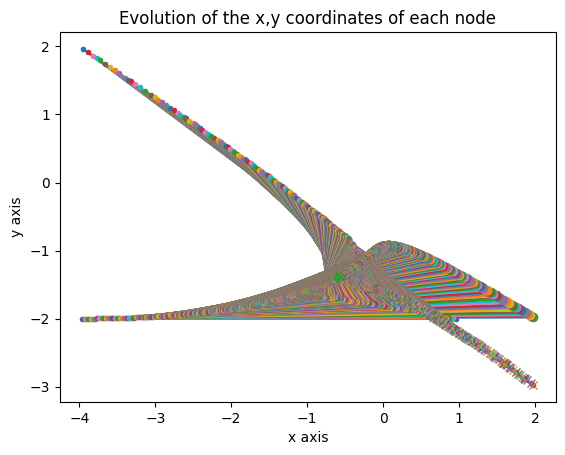

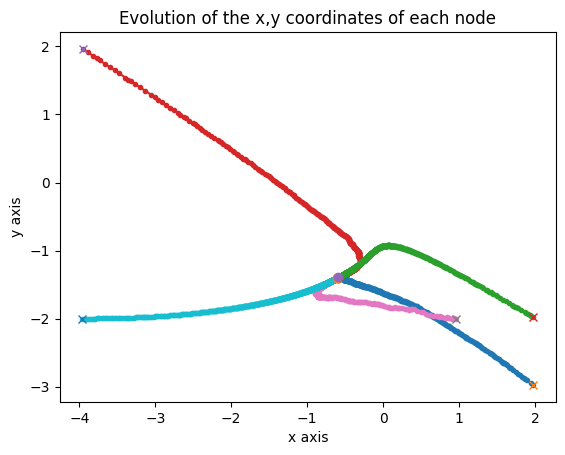

In [29]:
# Plot the results
plotter.plot_evolutionxy(robot_evolution_x,robot_evolution_y)
states_x_iter = robot_evolution_x
states_y_iter = robot_evolution_y
plt.title("Evolution of the x,y coordinates of each node")
plt.xlabel("x axis")
plt.ylabel("y axis")
(num_iter,n)=states_x_iter.shape
for i in range(n):
    v_x=states_x_iter[:,i]
    v_y=states_y_iter[:,i]
    plt.plot(v_x,v_y, marker='.',)
    # Special markers for the first and last values
    plt.plot(v_x[0],v_y[0],marker='x')
    plt.plot(v_x[-1],v_y[-1],marker='o')
    # alternative if we want to use arrows instead of lines.
    #x_ini=v_x[k]
    #y_ini=v_y[k]
    #dx= v_x[k+1] -x_ini
    #dy= v_y[k+1] -y_ini
    #plt.arrow(x_ini, y_ini, dx, dy, head_length=0.1,length_includes_head=True, head_width=0.05)
plt.show()

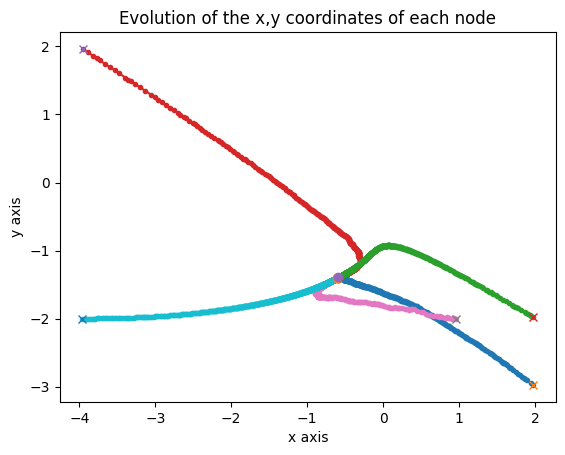

(2001,)

In [ ]:
# Video?
plotter.plot_evolutionxy_video(robot_evolution_x,robot_evolution_y)